# Exercise notebook 5:  The perceptron

In this notebook you will explore the perceptron algorithm.  For all questions use the breast cancer dataset we looked at in class.


### Part 1

Explore the accuracy of the perceptron on the breast cancer dataset while varying the number of epochs that the perceptron is trained.  **Measure accuracy on both the training and test sets** and **plot the results as a function of number of epochs** (best to use a logarithmic axis for the x-axis, using plt.semilogx).  What can you conclude?


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:

class perceptron :
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, iterations=100, learning_rate=0.2, 
                 plot_data=False, random_w=False, seed=42) :
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = plot_data
        self.random_w = random_w
        self.seed = seed
  
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        
        if self.random_w :
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, len(X[0]))
            # print("initialized with random weight vector")
        else :
            self.w = np.zeros(len(X[0]))
            # print("initialized with a zeros weight vector")
        self.wold = self.w
        converged = False
        iteration = 0
        while (not converged and iteration <= self.iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.wold = self.w
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    if self.plot_data:
                        self.plot_update(X, y, i)
            iteration += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iteration)
 
    def decision_function(self, x) :
        return np.dot(x, self.w)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.dot(X, self.w)
        return np.sign(scores)
    
    def plot_update(self, X, y, ipt) :
        fig = plt.figure(figsize=(4,4))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.arrow(0,0,self.w[0],self.w[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='darkred')
        plt.arrow(0,0,self.wold[0],self.wold[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='orange')
        anew = -self.w[0]/self.w[1]
        aold = -self.wold[0]/self.wold[1]
        pts = np.linspace(-1,1)
        plt.plot(pts, anew*pts, color='darkred')
        plt.plot(pts, aold*pts, color='orange')
        plt.title("in orange:  old w; in red:  new w")
        cols = {1: 'g', -1: 'b'}
        for i in range(len(X)): 
            plt.plot(X[i][0], X[i][1], cols[y[i]]+'o', alpha=0.6,markersize=5) 
        plt.plot(X[ipt][0], X[ipt][1], 'ro', alpha=0.2,markersize=20)

In [ ]:
num_epochs = [2, 5, 10, 20, 40, 100,200, 500, 1000, 2000, 4000]
data = load_breast_cancer()
X = data.data
y = data.target
y=y*2-1
accuracy_train = []
accuracy_test = []
for x in num_epochs:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
  p = perceptron(iterations = x, learning_rate = 0.01)
  p.fit(X_train,y_train)
  y_pred_test = p.predict(X_test)
  y_pred_train = p.predict(X_train) 
  accuracy_test.append(np.mean(y_test == y_pred_test))
  accuracy_train.append(np.mean(y_train == y_pred_train))
print(accuracy_train)
print(accuracy_test)

[0.592964824120603, 0.8944723618090452, 0.9045226130653267, 0.8994974874371859, 0.821608040201005, 0.8869346733668342, 0.8291457286432161, 0.8341708542713567, 0.7889447236180904, 0.7864321608040201, 0.914572864321608]
[0.5964912280701754, 0.9298245614035088, 0.9298245614035088, 0.9239766081871345, 0.8538011695906432, 0.9181286549707602, 0.8771929824561403, 0.8421052631578947, 0.8011695906432749, 0.7953216374269005, 0.9181286549707602]


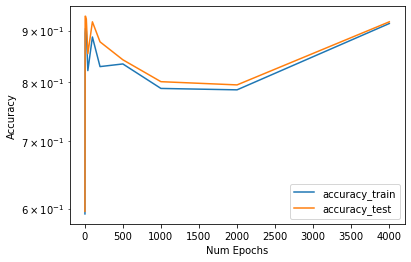

In [ ]:
plt.semilogy(num_epochs,accuracy_train, label = "accuracy_train")
plt.semilogy(num_epochs,accuracy_test, label = "accuracy_test")
plt.xlabel("Num Epochs")
plt.ylabel("Accuracy")
plt.legend();

Since the number of epochs determine the number of times weights are changed. As we can see the graph, from the 2000 num of empochs to 4000 number of empochs, the accuracy starting increasing.

### Part 2

Can you tell if the dataset is linearly separable?



The dataset is not linearly separable.




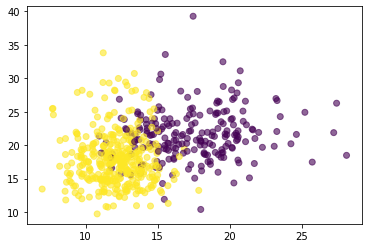

In [ ]:

plt.scatter(X[:, 0], X[:, 1], c= y, alpha=0.6);
plt.arrow(2, -2, -4, 4,width=0.02,head_width=0.0, length_includes_head=True, 
         alpha=1,linestyle='-',color='black');

### Part 3 

Do you observe differences in performance by changing the learning rate?
Use a plot of training and test accuracy as a function of learning rate to address this question.  Again, use plt.semilogx for the x-axis to have a logarithmic scale.

In [ ]:
learning_rates = [0.00001, 0.001, 0.01, 0.1, 1]

data = load_breast_cancer()
X = data.data
y = data.target
y=y*2-1
accuracy_train = []
accuracy_test = []

for l in learning_rates:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    p = perceptron(iterations = 100, learning_rate = l)
    p.fit(X_train,y_train)
    y_pred_test = p.predict(X_test)
    y_pred_train = p.predict(X_train) 
    accuracy_test.append(np.mean(y_test == y_pred_test))
    accuracy_train.append(np.mean(y_train == y_pred_train))
print(accuracy_train)
print(accuracy_test)



[0.8869346733668342, 0.8869346733668342, 0.8869346733668342, 0.8869346733668342, 0.8869346733668342]
[0.9181286549707602, 0.9181286549707602, 0.9181286549707602, 0.9181286549707602, 0.9181286549707602]


Do you observe differences in performance by changing the learning rate? 
the accuracy of train and test data didn't change because the peceptron algorithm try to find a soultion in an upperbound number of steps. The learning rate is not very usefull for it.

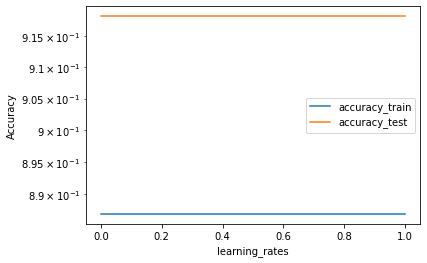

In [ ]:
plt.semilogy(learning_rates,accuracy_train, label = "accuracy_train")
plt.semilogy(learning_rates,accuracy_test, label = "accuracy_test")
plt.xlabel("learning_rates")
plt.ylabel("Accuracy")
plt.legend();

### Part 4 

Run the perceptron on **10 different train-test splits**.  Compute **the test accuracy** on each split.  What is the **average and standard deviation** that you observe?  (You can use `np.mean` and `np.std` for computing these statistics).  What can you conclude based on these data?

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
y=y*2-1
#accuracy_train = []
accuracy_test = []

for l in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=l)
    p = perceptron(iterations = 100, learning_rate = 0.01)
    p.fit(X_train,y_train)
    y_pred_test = p.predict(X_test)
    y_pred_train = p.predict(X_train) 
    accuracy_test.append(np.mean(y_test == y_pred_test))
   # accuracy_train.append(np.mean(y_train == y_pred_train))
#print(accuracy_train)
print(accuracy_test)
mean = np.mean(accuracy_test)
st_d = np.std(accuracy_test)

print(mean, st_d)

[0.935672514619883, 0.9181286549707602, 0.8771929824561403, 0.9181286549707602, 0.8654970760233918, 0.9181286549707602, 0.8947368421052632, 0.8947368421052632, 0.8187134502923976, 0.9122807017543859]
0.8953216374269004 0.03250220638968481


I changed random_state from 0 to 9 and get 10 different train-test splits. Each random have different test accuracy and when the random state increase the test accuracy decrease. The result of average is 0.8953216374269004 and the result of standard deciation is 0.03250220638968481. The standard deviation shows that the data are clustere closely acround the mean.